<a href="https://colab.research.google.com/github/Calvin-CS344-21SP/ai-portfolio-epigeneticschick/blob/main/Copy_of_A_Batch_of_Practice_(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `005-image-ops`

Task: perform broadcast and reduction operations on a tensor representing a batch of color images

# Setup

In [ ]:
!pip install -U fastbook torchtext==0.8.1


Requirement already up-to-date: fastbook in /usr/local/lib/python3.7/dist-packages (0.0.16)
Requirement already up-to-date: torchtext==0.8.1 in /usr/local/lib/python3.7/dist-packages (0.8.1)


In [ ]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

Download dataset.

In [ ]:
path = untar_data(URLs.PETS) / "images"

Make a stable order for the images: first sort, then randomize using a known seed.

In [ ]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

Define how we're going to split the data into a training and validation set.

In [ ]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [ ]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

def get_y(file_path):
    return cat_or_dog(file_path.name)

Define a standard image-classification `DataBlock`.

In [ ]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

Override `shuffle_fn` so that the images never actually get shuffled (batch order is consistent).

In [ ]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [ ]:
batch = dataloaders.train.one_batch()
images, labels = batch

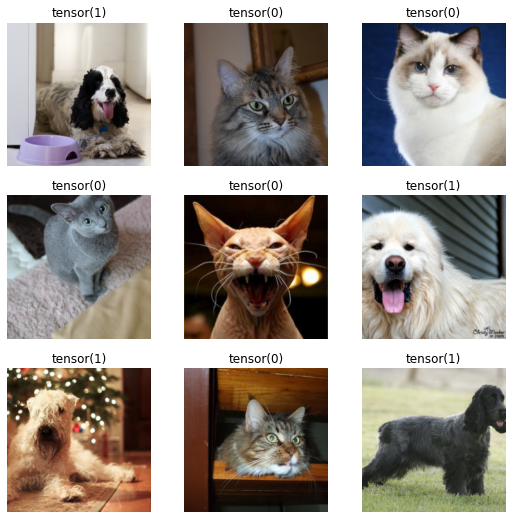

In [ ]:
show_image_batch((images, labels))

# Task

Try each of the following:

1. **Run `images.shape`**. What does each number represent? There are four numbers. The last two numbers represent the dimension of the images. The first two numbers signifiy rows and columns. 
2. **Run `labels`**. Explain those numbers, with the help of `dataloaders.train.vocab`. The catergories are whether or not it is a cat or dog represented as either a 1 or 0.
3. **Show the first image in the batch.**
4. **Show the average image (mean along dimension ___)**.
5. **Make the images grayscale**. Show the result.
6. **Invert the color of the images** (e.g., black becomes white). Show the result.
7. **Show only the red color channel**. *it's okay if it's not shown as red.*
8. **Show a 64-pixel-square cutout of the image, starting at 64 pixels in from the top and left.**
9. **Show the result of applying `Rotate` on the images.** Set `max_deg` to 45 and `p` to 1.0.

In [ ]:
print(labels)
dataloaders.train.vocab

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1])


['cat', 'dog']

In [ ]:
images.shape
len(images)

9

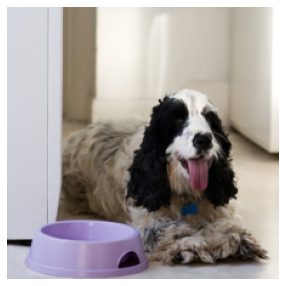

In [ ]:
images[0].show()

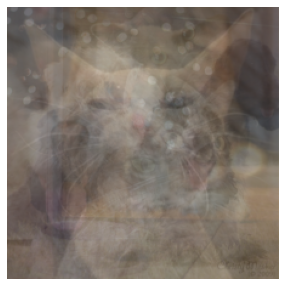

In [ ]:
images.mean(0).show()

In [ ]:
!pip install kornia

     |████████████████████████████████| 276kB 5.6MB/s 


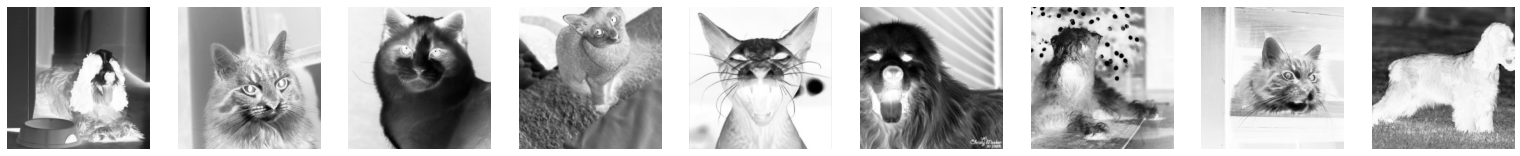

In [ ]:
show_images(images.mean(1))

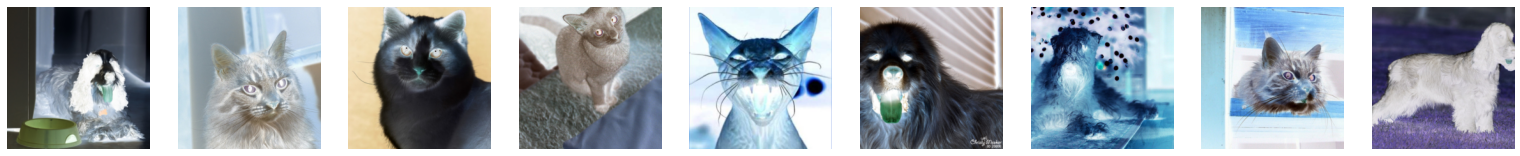

In [ ]:
show_images(1-images)

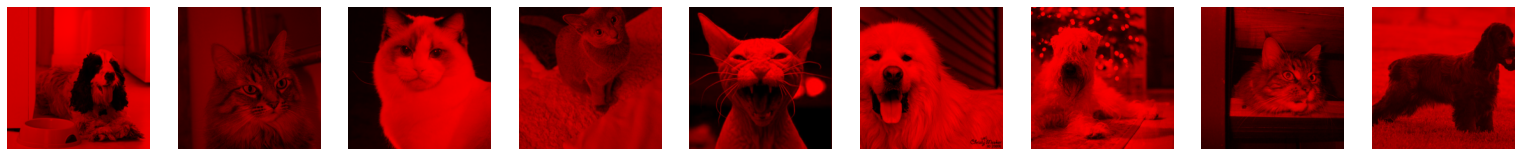

In [ ]:
r = images
r[:,1,:,:]=0
r[:,2,:,:]=0
show_images(r)

In [ ]:
import tensorflow as tf


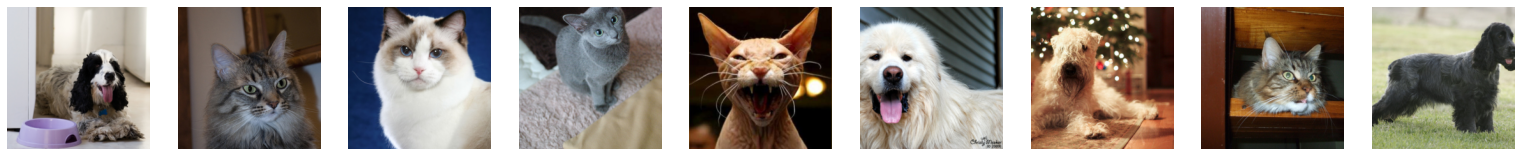

In [ ]:

images[64:128, 64:128]
show_images(images)

In [ ]:
images.rotate(max_deg=45, p=1.0)

RuntimeError: ignored